1. Tentukan Library yang digunakan

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import tree

2. Load data

In [2]:
datagizi_dataset = pd.read_csv('DataGiziAnakDesaHitu.csv')


In [3]:
datagizi_dataset.head()

,Jenis_Kelamin,Umur_Bulan,Berat_Badan,Tinggi_Badan,Status_Gizi
0,0,27,12,85,1
1,1,1,4,54,1
2,0,20,12,85,1
3,0,8,9,69,1
4,1,1,4,55,1


In [4]:
datagizi_dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Jenis_Kelamin  436 non-null    int64
 1   Umur_Bulan     436 non-null    int64
 2   Berat_Badan    436 non-null    int64
 3   Tinggi_Badan   436 non-null    int64
 4   Status_Gizi    436 non-null    int64
dtypes: int64(5)
memory usage: 17.2 KB


VISUALISASI DATA

In [5]:
import plotly.figure_factory as ff
import plotly.express as px
import matplotlib.pyplot as plt

In [6]:
fig = px.bar(datagizi_dataset['Jenis_Kelamin'].value_counts(),
             title="Melihat data Jenis Kelamin")
fig.show()

In [7]:
datagizi_dataset['Status_Gizi'].value_counts()

Status_Gizi
1    423
0     13
Name: count, dtype: int64

In [8]:
datagizi_dataset['Status_Gizi'] = datagizi_dataset['Status_Gizi'].replace(['Gizi Buruk'],'Gizi Kurang')

In [9]:
datagizi_dataset['Status_Gizi'].value_counts()

Status_Gizi
1    423
0     13
Name: count, dtype: int64

In [10]:
# melihat value dari kolom Label
print("Data kolom Status_Gizi :\n",datagizi_dataset['Status_Gizi'].unique() )

Data kolom Status_Gizi :
 [1 0]


Label Endoding

In [11]:
le = LabelEncoder()

In [12]:
#untuk mentranformasikan isi kolam yang berupa kategorikal menjadi numerik
for column in datagizi_dataset:
    if datagizi_dataset[column].dtypes == object:
        datagizi_dataset[column] = le.fit_transform(datagizi_dataset[column])

In [13]:
datagizi_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Jenis_Kelamin  436 non-null    int64
 1   Umur_Bulan     436 non-null    int64
 2   Berat_Badan    436 non-null    int64
 3   Tinggi_Badan   436 non-null    int64
 4   Status_Gizi    436 non-null    int64
dtypes: int64(5)
memory usage: 17.2 KB


In [14]:
# melihat hasil normalisasi dengan label encode 
print("Data kolom Jenis_Kelamin :\n",datagizi_dataset['Jenis_Kelamin'].unique() )
print("Data kolom Status_Gizi :\n",datagizi_dataset['Status_Gizi'].unique() )

Data kolom Jenis_Kelamin :
 [0 1]
Data kolom Status_Gizi :
 [1 0]


Normalizer

In [15]:
array = datagizi_dataset.values

In [16]:
data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
data_rescaled = data_scaler.fit_transform(array)

In [17]:
print ("\nScaled data:\n", data_rescaled[0:10])


Scaled data:
 [[0.         0.45762712 0.66666667 0.56896552 1.        ]
 [1.         0.01694915 0.         0.03448276 1.        ]
 [0.         0.33898305 0.66666667 0.56896552 1.        ]
 [0.         0.13559322 0.41666667 0.29310345 1.        ]
 [1.         0.01694915 0.         0.05172414 1.        ]
 [0.         0.83050847 1.         0.81034483 1.        ]
 [0.         0.62711864 0.75       0.81034483 1.        ]
 [0.         0.16949153 0.33333333 0.31034483 1.        ]
 [1.         1.         0.91666667 0.9137931  1.        ]
 [0.         1.         1.         0.9137931  1.        ]]


In [18]:
Data_Normalizer = Normalizer(norm='l1').fit(array)
Data_Normalizer = Data_Normalizer.transform(array)

In [19]:
datagizi_dataset.head()

,Jenis_Kelamin,Umur_Bulan,Berat_Badan,Tinggi_Badan,Status_Gizi
0,0,27,12,85,1
1,1,1,4,54,1
2,0,20,12,85,1
3,0,8,9,69,1
4,1,1,4,55,1


In [20]:
datagizi_dataset.to_csv('DataGiziAnakDesaHitu.csv')

Memisahkan Data Training dan Data Testing

In [21]:
atr_data = datagizi_dataset.drop(columns = 'Status_Gizi')
atr_data

,Jenis_Kelamin,Umur_Bulan,Berat_Badan,Tinggi_Badan
0,0,27,12,85
1,1,1,4,54
2,0,20,12,85
3,0,8,9,69
4,1,1,4,55
...,...,...,...,...
431,1,54,15,103
432,0,55,15,104
433,1,55,15,105
434,1,35,12,87


In [22]:
cls_data = datagizi_dataset['Status_Gizi']
cls_data

0      1
1      1
2      1
3      1
4      1
      ..
431    1
432    1
433    1
434    1
435    1
Name: Status_Gizi, Length: 436, dtype: int64

Bagi dataset menjadi data latih dan data uji

In [23]:
x_train, x_test, y_train, y_test, = train_test_split(atr_data ,cls_data , test_size = 0.25, random_state = 0)

print("x_train =", len(x_train))
print("x_test =", len(x_test))
print("y_train =", len(y_train))
print("y_test =", len(y_test))

x_train = 327
x_test = 109
y_train = 327
y_test = 109


In [24]:
model =DecisionTreeClassifier(random_state=0, max_depth=None,criterion='entropy', min_samples_split=2, min_samples_leaf=1,min_weight_fraction_leaf=0,max_leaf_nodes=None,min_impurity_decrease=0)

In [25]:
# Melatih model
tree = model.fit(x_train, y_train)

In [26]:
# melakukan prediksi
y_pred = model.predict(x_test)

Membuat Model Evaluasi untuk mengukur tingkat Akurasi

In [27]:
x_train_prediction = tree.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)
print('Akurasi data training adalah =', training_data_accuracy)

Akurasi data training adalah = 0.9969418960244648


In [28]:
x_test_prediction = tree.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
print('Akurasi data testing adalah =', test_data_accuracy)

Akurasi data testing adalah = 0.9724770642201835


In [29]:
# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
recall = recall_score(y_test, y_pred, average='macro', zero_division=1)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=1)

# Menampilkan hasil evaluasi
print("Akurasi: {:.2f}%".format(accuracy * 100))
print("Presisi: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1-Score: {:.2f}%".format(f1 * 100))

Akurasi: 97.25%
Presisi: 86.55%
Recall: 79.52%
F1-Score: 82.62%


In [30]:
# Menggunakan classification_report dengan zero_division
report = classification_report(y_test, y_pred, zero_division=1)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.98      0.99      0.99       104

    accuracy                           0.97       109
   macro avg       0.87      0.80      0.83       109
weighted avg       0.97      0.97      0.97       109



In [31]:
#Confusion Matrix
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)

Confusion Matrix:
[[  3   2]
 [  1 103]]


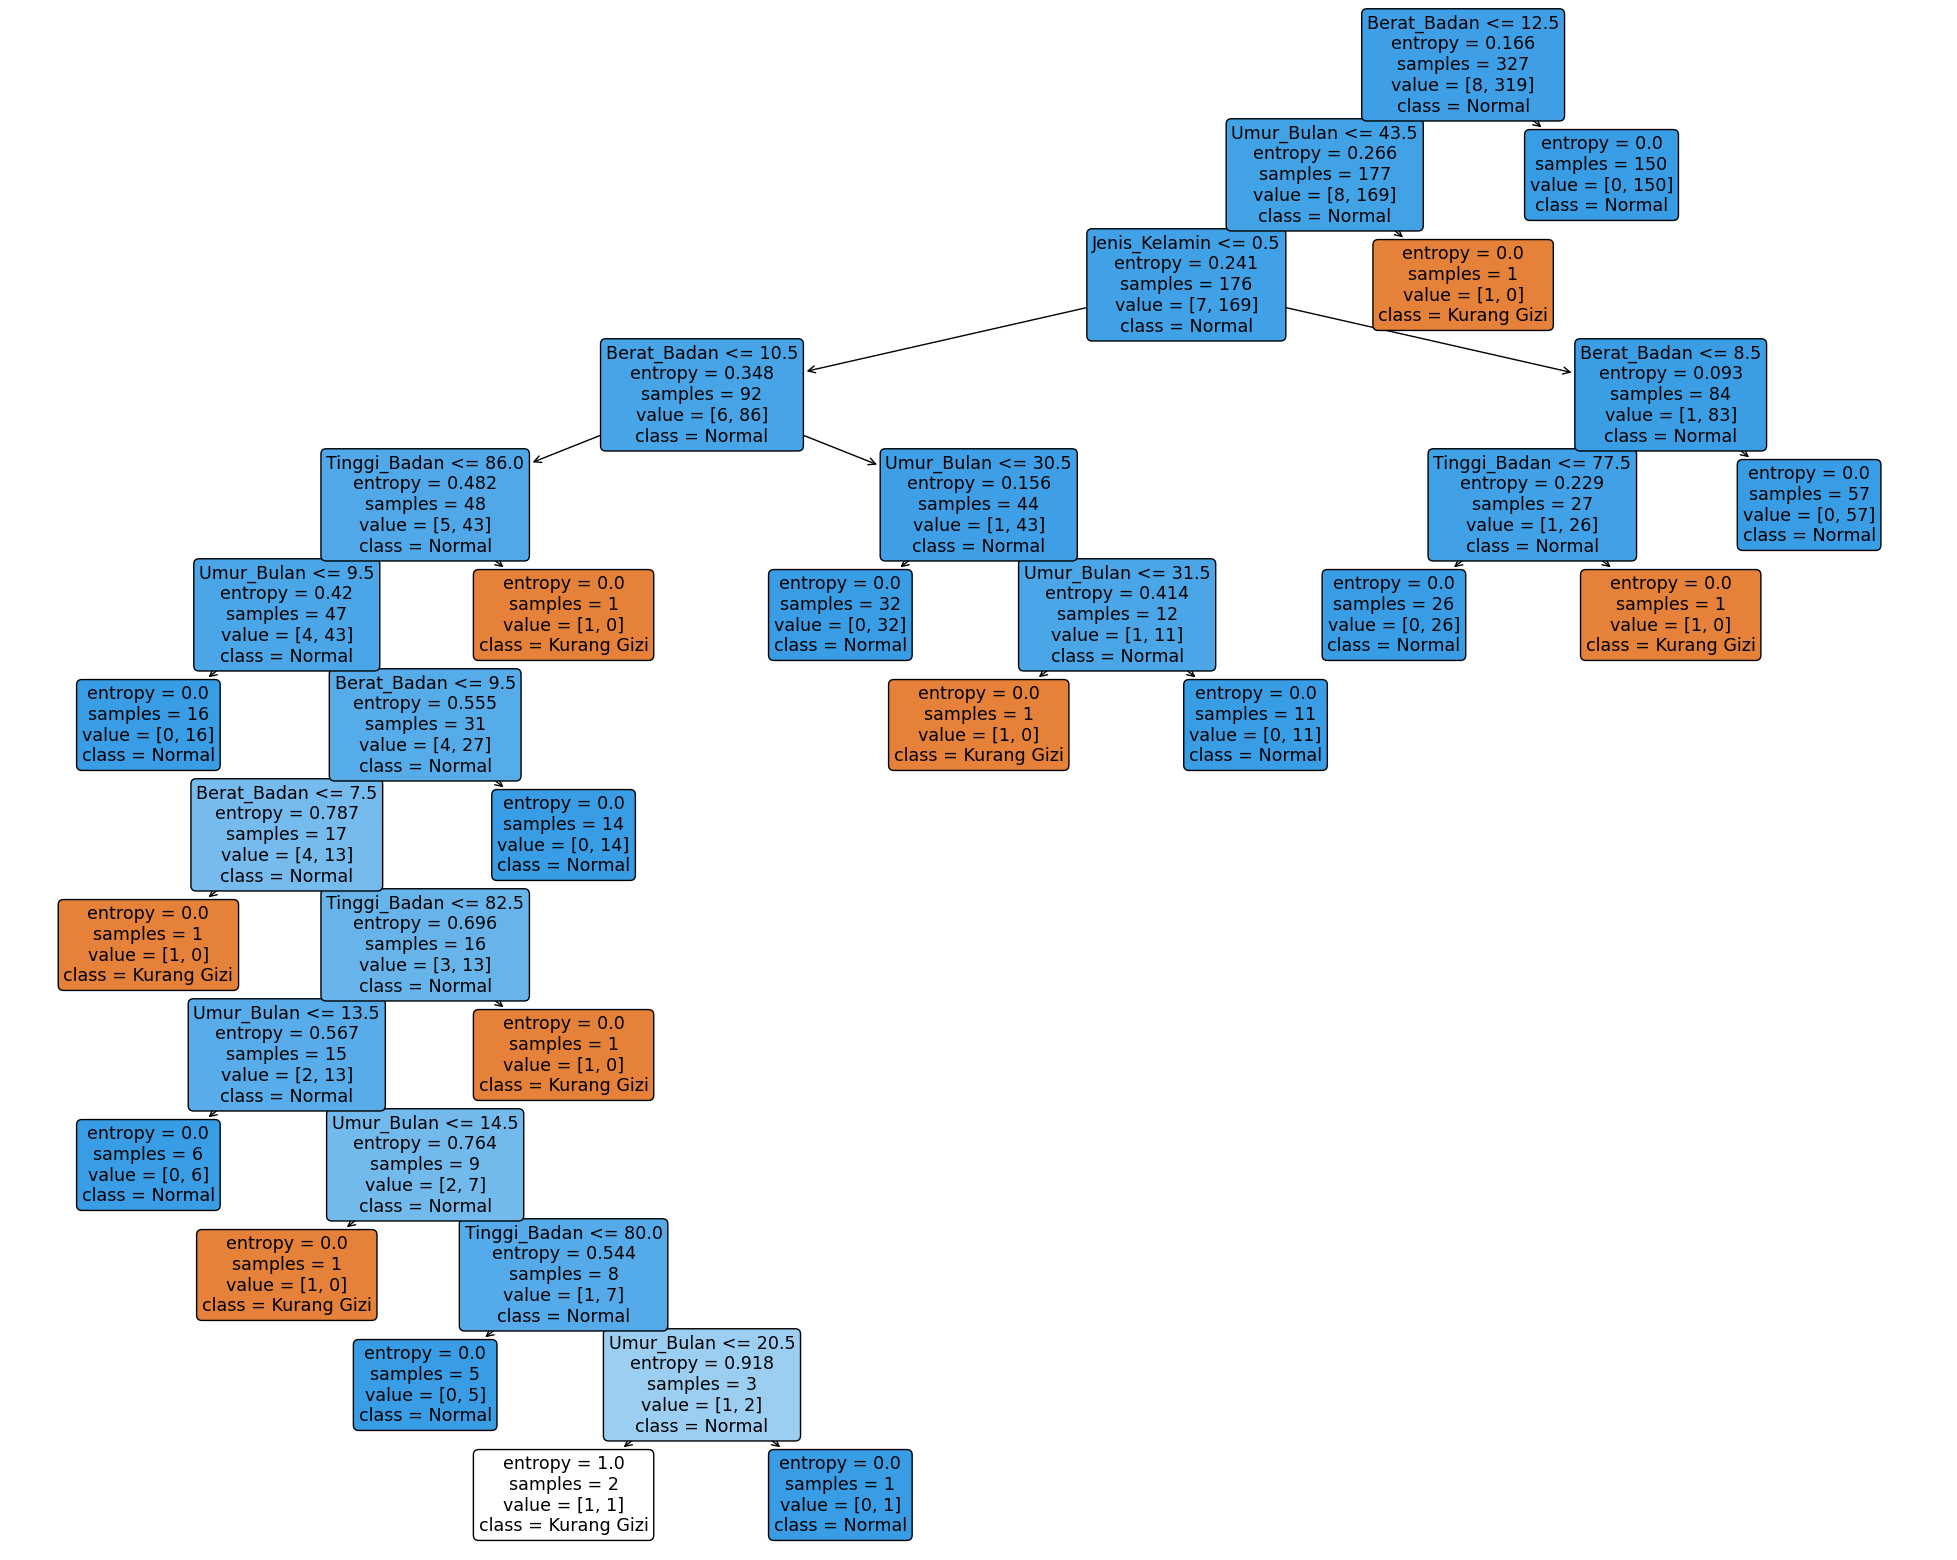

In [32]:
# Menampilkan grafik keputusan
plt.figure(figsize=(25, 20))
plot_tree(model, feature_names=atr_data.columns, class_names=("Kurang Gizi", "Normal"), filled=True, rounded=True)
plt.show()

Membuat Model Prediksi

In [33]:
input_data = (0,31,10,87)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1, -1)


prediction = tree.predict(input_data_reshape)
print(prediction)

#kondisi
if(prediction[0]== 1):
    print('Status Gizi Anak Normal')

else :
    print('Status Gizi Anak Kurang')


[0]
Status Gizi Anak Kurang


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



Simpan Model

In [34]:
import pickle

In [36]:
filename = 'StatusGiziAnak_model.sav'
pickle.dump(tree, open(filename,'wb'))